Задание 2.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

До:	(404, 1)
После:	(404, 2)


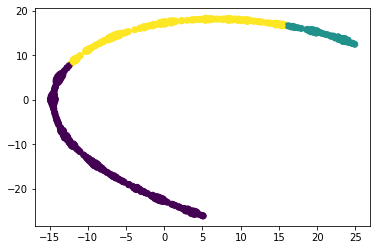

feature_names    6.886207
dtype: float64
feature_names    26.319231
dtype: float64
feature_names    15.209866
dtype: float64


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

print('Задание 2.')

# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.

boston = load_boston()

data = boston['data']
data = data.transpose()

target = boston['target']

X = pd.DataFrame(data=data[12], columns=['feature_names'])

Y = pd.DataFrame(target, columns=['price'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

print(X_train[labels_train==0].mean())
print(X_train[labels_train==1].mean())
print(X_train[labels_train==2].mean())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


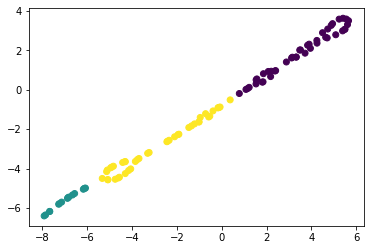

feature_names    6.938372
dtype: float64
feature_names    25.853125
dtype: float64
feature_names    15.294884
dtype: float64


In [24]:
print('Задание 3.')

# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


X_test_tsne = tsne.fit_transform(X_test_scaled)

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_test = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

print(X_test[labels_test==0].mean())
print(X_test[labels_test==1].mean())
print(X_test[labels_test==2].mean())